In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [310]:
per = lambda x: x / 15000 * 100

# Обработка данных

In [311]:
data = pd.read_csv("../data/tinkoff_legal_entities_new.csv")

In [312]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
14955,a401122666601a,2022-11-05 00:00:00,1,2.0,3.0,5.0,3405.0,0.15,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5748,a781136136240a,2022-08-26 00:00:00,14,0.0,0.0,0.0,4070.0,0.00,14.0,0.0,...,NaN,4.2,140.0,69.0,4.5,0.0,0.714286,1.0,NaN,NaN
6075,a482110659779a,2022-10-23 00:00:00,1,0.0,0.0,0.0,1354.0,0.00,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9024,a1650293518a,2022-02-18 00:00:00,1,0.0,0.0,0.0,297.0,0.00,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14574,a370605486117a,2022-08-23 00:00:00,2,0.0,0.0,0.0,540.0,0.00,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
data.shape

(15000, 35)

## работа с NaN

In [314]:
data.isna().sum() / data.shape[0] * 100

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

<AxesSubplot:>

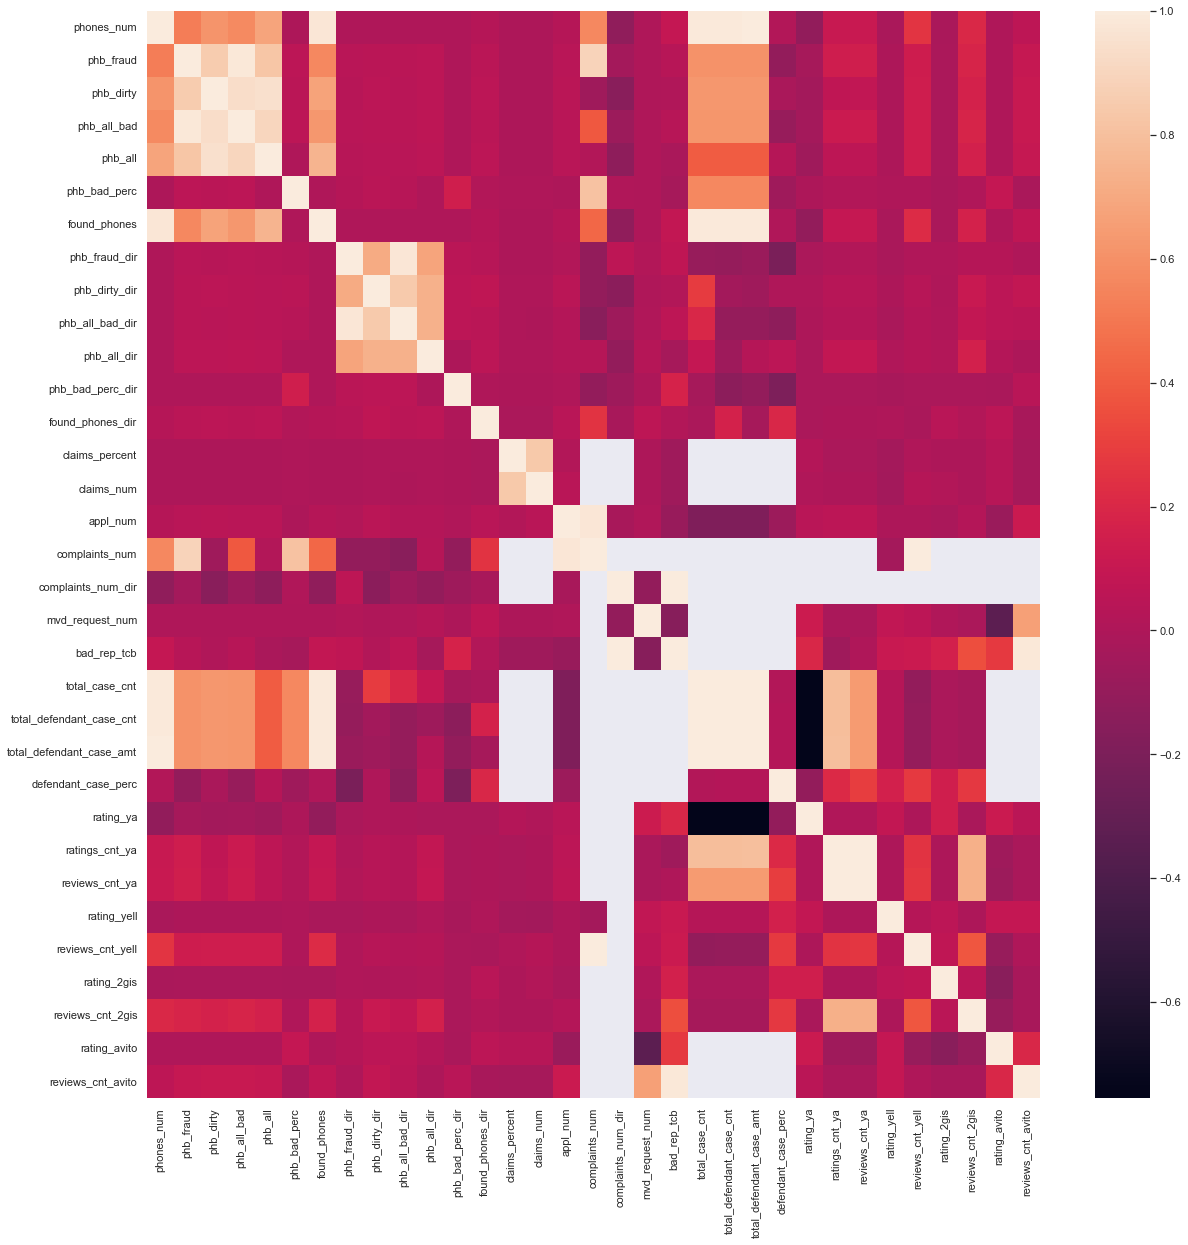

In [315]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())

In [316]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [317]:
data.phb_bad_perc_dir.isna().sum()

1231

In [318]:
data.phb_all_dir.isna().sum()

1231

In [319]:
data.phones_num.isna().sum()

0

In [320]:
data.claims_percent.value_counts()

0.00      9818
50.00       25
33.33       19
40.00        7
66.67        7
100.00       4
60.00        3
25.00        3
58.33        1
57.14        1
63.64        1
75.00        1
42.86        1
85.71        1
70.00        1
14.29        1
7.14         1
20.00        1
62.50        1
71.43        1
Name: claims_percent, dtype: int64

In [321]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir", # !
    "phb_all_bad_dir", # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [322]:
data[rating_columns] = data[rating_columns].fillna(-1)

In [323]:
data[reviews_count_columns] = data[reviews_count_columns].fillna(-1)

In [324]:
data[phones] = data[phones].fillna(0)

In [325]:
data[bank_and_police] = data[bank_and_police].fillna(0)

In [326]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                   5102
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [327]:
data[data_without_description] = data[data_without_description].fillna(0)

In [328]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                      0
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [329]:
data.to_csv("../data/clean_data.csv", index=False)

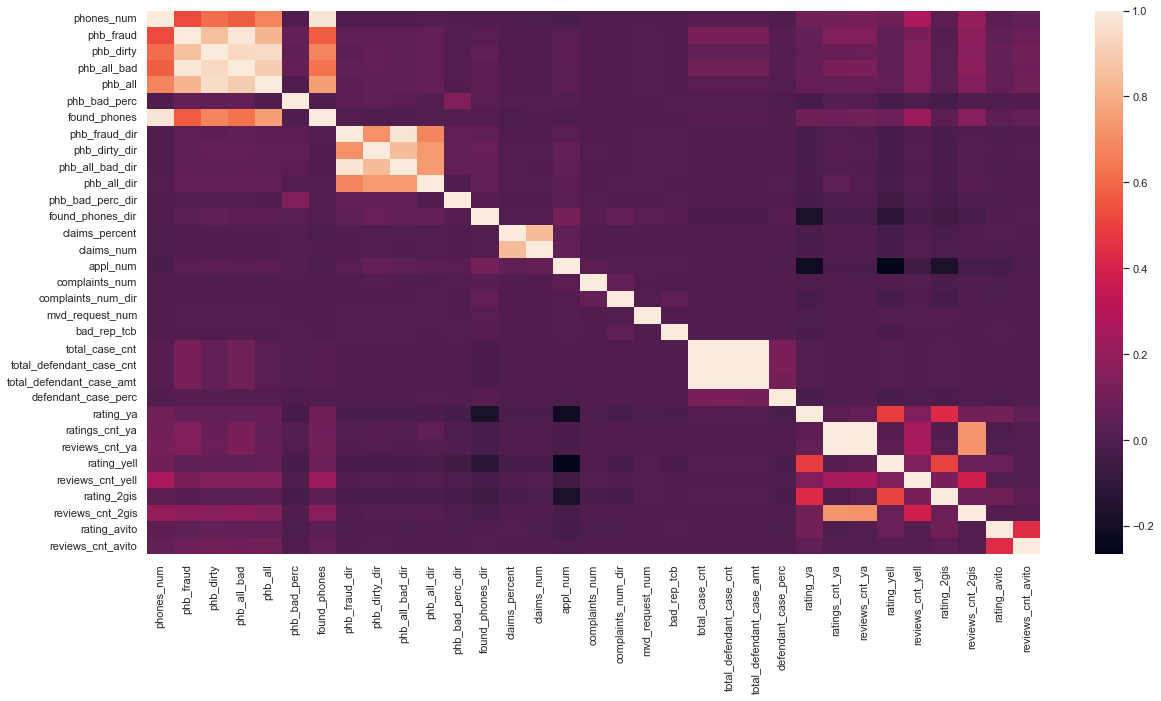

In [330]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr())
plt.savefig("figures/corr.png")

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15000 non-null  object 
 1   date                      15000 non-null  object 
 2   phones_num                15000 non-null  int64  
 3   phb_fraud                 15000 non-null  float64
 4   phb_dirty                 15000 non-null  float64
 5   phb_all_bad               15000 non-null  float64
 6   phb_all                   15000 non-null  float64
 7   phb_bad_perc              15000 non-null  float64
 8   found_phones              15000 non-null  float64
 9   phb_fraud_dir             15000 non-null  float64
 10  phb_dirty_dir             15000 non-null  float64
 11  phb_all_bad_dir           15000 non-null  float64
 12  phb_all_dir               15000 non-null  float64
 13  phb_bad_perc_dir          15000 non-null  float64
 14  found_

In [332]:
data.date = pd.to_datetime(data.date)

In [333]:
to_int_columns = [
    "appl_num",
    "bad_rep_tcb",
    "claims_num",
    "complaints_num",
    "complaints_num_dir",
    "found_phones",
    "found_phones_dir",
    "mvd_request_num",
    "phb_all",
    "phb_all_bad",
    "phb_all_bad_dir",
    "phb_all_dir",
    "phb_dirty",
    "phb_dirty_dir",
    "phb_fraud",
    "phb_fraud_dir",
    "phones_num",
    "ratings_cnt_ya",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "total_case_cnt",
    "total_defendant_case_amt",
    "total_defendant_case_cnt"
]

In [334]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                      0
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [335]:
# data[to_int_columns] = data[to_int_columns].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [336]:
data.id.nunique()

14787

In [337]:
data.duplicated().sum()

0

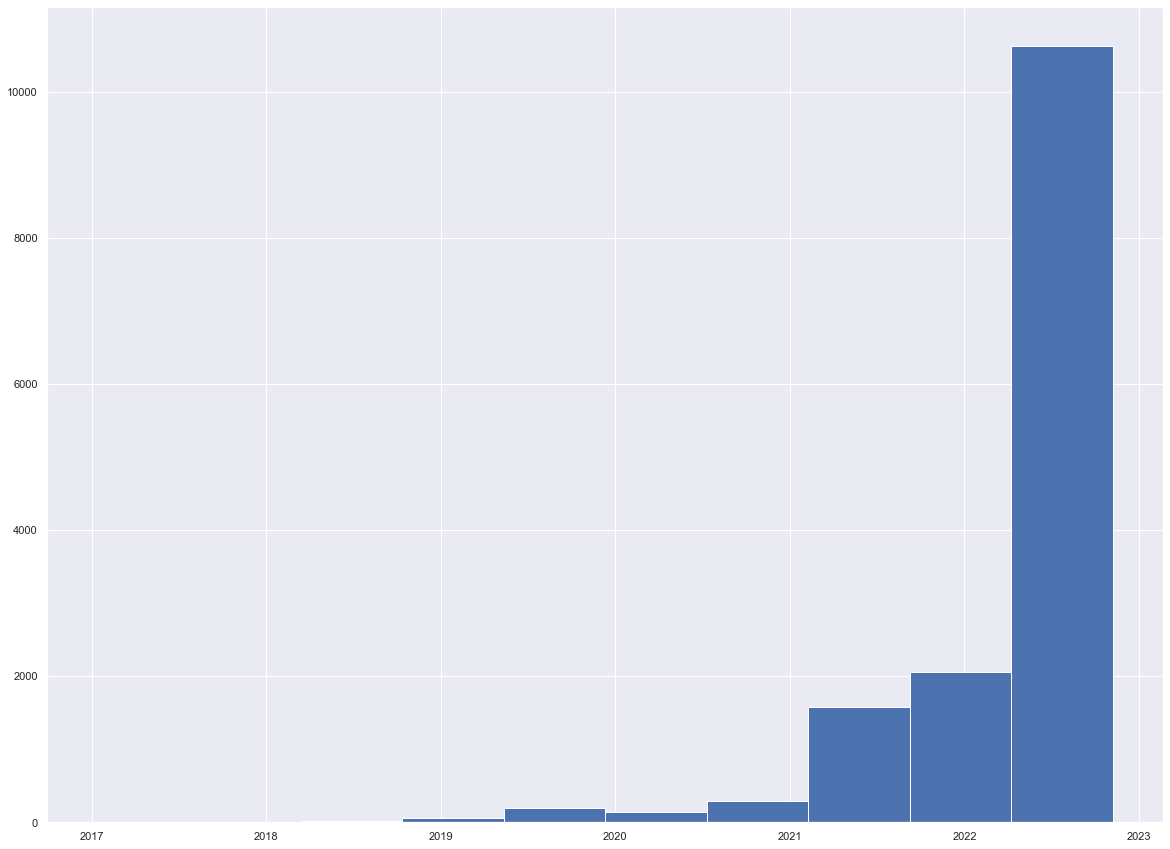

In [338]:
plt.figure(figsize=(20, 15))
plt.hist(data.date)
plt.show()

In [339]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

In [340]:
data.loc[
    (data.rating_ya != -1) |
    (data.rating_yell != -1) |
    (data.rating_avito != -1) |
    (data.rating_2gis != -1) |
    (data.ratings_cnt_ya != -1)
].shape

(15000, 35)

In [341]:
per(7713)

51.42

In [342]:
data.loc[
    (data.rating_ya != -1) &
    (data.rating_yell != -1) &
    (data.rating_avito != -1) &
    (data.rating_2gis != -1) &
    (data.ratings_cnt_ya != -1)
].shape

(135, 35)

In [343]:
per(135)

0.8999999999999999

In [344]:
data.loc[
    (data.rating_ya != -1) &
    (data.rating_yell != -1) &
    (data.rating_avito != -1) &
    (data.rating_2gis != -1) &
    (data.ratings_cnt_ya != -1)
].phones_num.mean()

112.16296296296296

In [345]:
rating_columns

['rating_ya', 'rating_yell', 'rating_avito', 'rating_2gis', 'ratings_cnt_ya']

In [346]:
data.loc[data.rating_yell != -1].rating_yell.mean()

4.2798102031744305

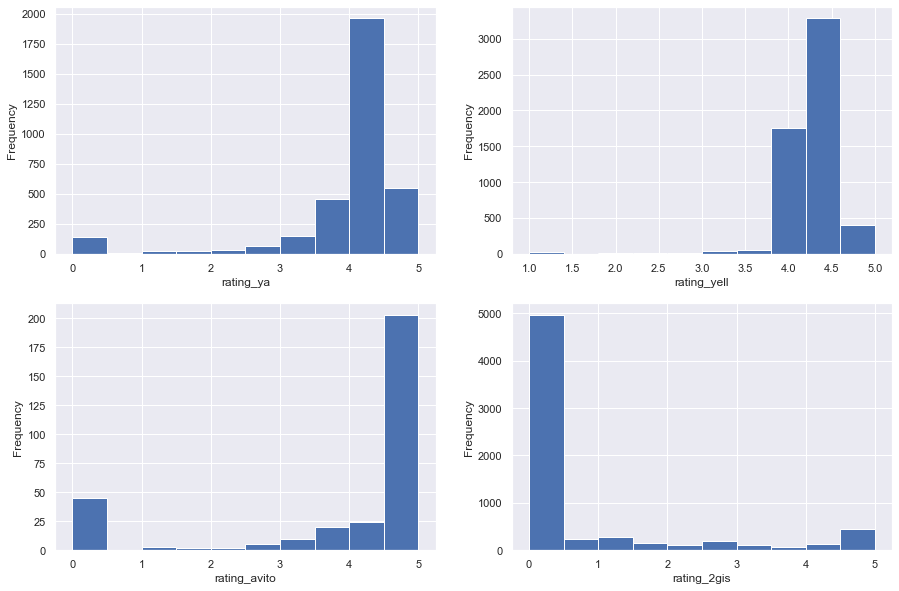

In [347]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    ax[k].set_xlabel(i)
    data.loc[data[i] != -1][i].plot(kind="hist", ax=ax[k])
    k += 1

In [348]:
data.loc[data.rating_2gis != -1].rating_2gis.mean()

0.7330523769195867

In [349]:
data.loc[data.rating_2gis != -1].rating_2gis.min()

0.0

In [350]:
data.loc[data.rating_ya != -1].rating_ya.mean()

3.9337455830388692

In [351]:
data.loc[data.rating_avito != -1].rating_avito.mean()

3.920486553432413

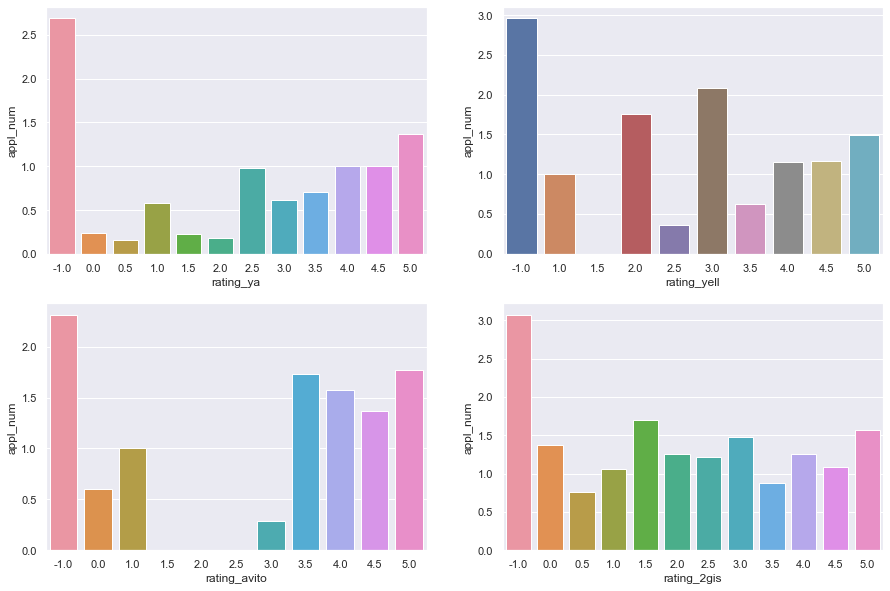

In [352]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    data_rating = data.copy()
    data_rating[i] = data_rating[i].apply(lambda x: round(x * 2) / 2)
    sns.barplot(
        ax=ax[k],
        x=data_rating.groupby(i).mean().index,
        y=data_rating.groupby(i).mean().appl_num
    )
    k += 1

In [353]:
data.loc[
    (data.rating_ya == -1) |
    (data.rating_yell == -1) |
    (data.rating_avito == -1) |
    (data.rating_2gis == -1) |
    (data.ratings_cnt_ya == -1)
].appl_num.mean()

2.307299024554322

In [354]:
# phb_all, phb_bad_perc, complaints_num, total_defendant_case_cnt, total_defendant_case_amt

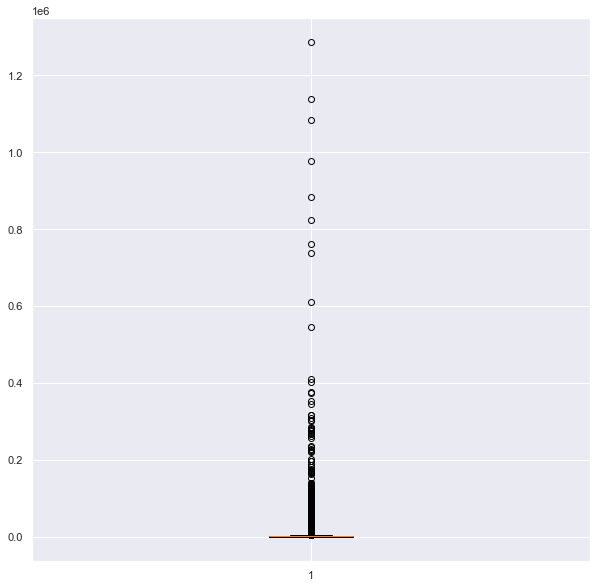

In [402]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.phb_all < 1500000].phb_all)
plt.savefig("figures/boxplot_phb_all.png")
plt.show()

In [399]:
data.phb_all.max()

5693618.0

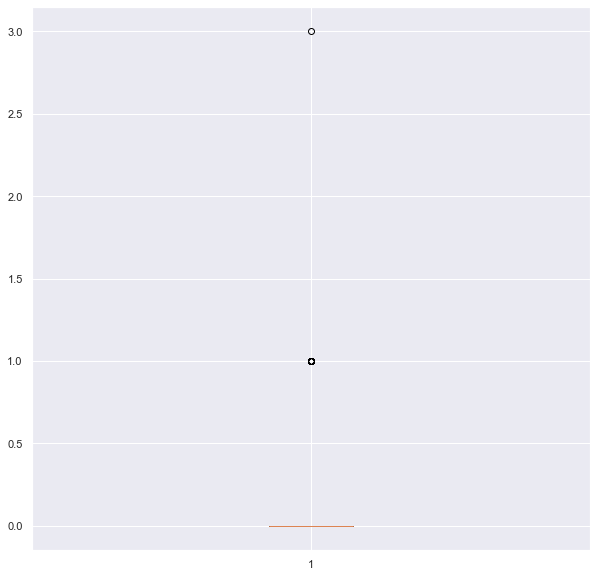

In [356]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.complaints_num)
plt.savefig("figures/complaints_num.png")
plt.show()

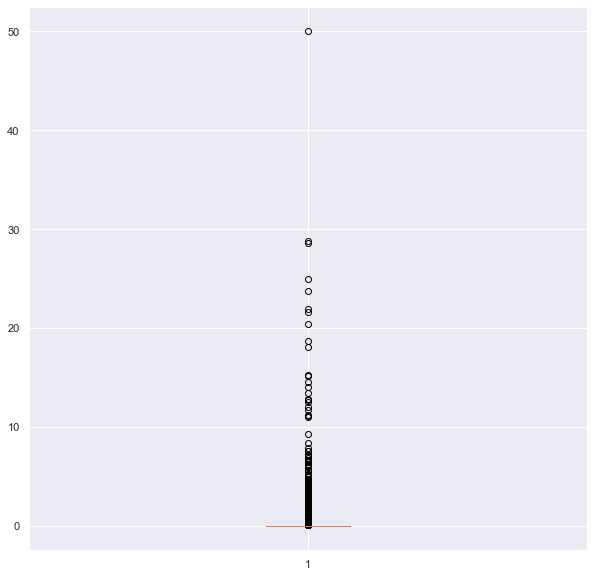

In [357]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.phb_bad_perc)
plt.savefig("figures/phb_bad_perc.png")
plt.show()

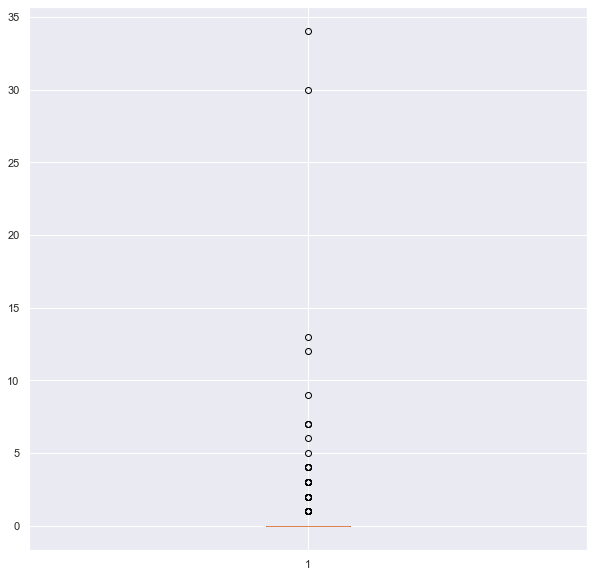

In [358]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.total_defendant_case_cnt < 2000].total_defendant_case_cnt)
plt.savefig("figures/boxplot_total_defendant_case_cnt.png")
plt.show()

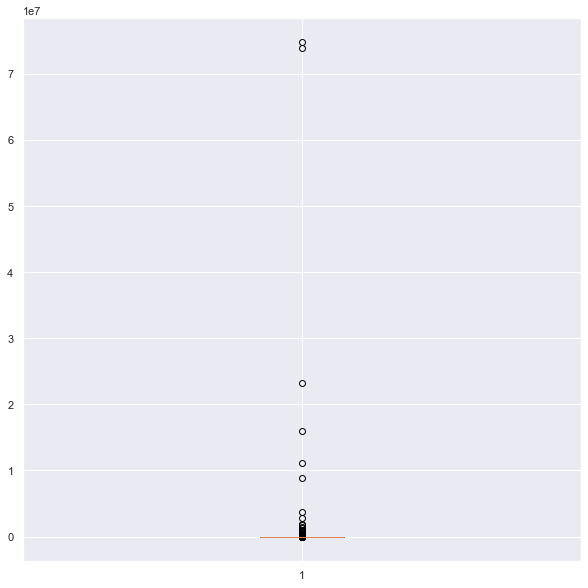

In [359]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.total_defendant_case_amt < 3 * 1e10].total_defendant_case_amt)
plt.savefig("figures/boxplot_total_defendant_case_amt.png")
plt.show()

In [376]:
data.total_defendant_case_amt.max()

42229455258.0

In [394]:
data.loc[data.total_defendant_case_amt == 42229455258]

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,popularity,mean_rating,all_reviews_cnt
928,a5047227020a,2022-11-01,344,778.0,177.0,955.0,171006.0,0.56,334.0,0.0,...,198.0,4.25,0.0,0.375,2.0,-1.0,-1.0,4,2.008333,199.0


In [360]:
quant = data.phb_all.quantile([0, 0.25, 0.50, 0.75, 1])
def get_size(phb_cnt):
    for i, v in enumerate(quant.values):
        if phb_cnt <= v:
            return i

In [361]:
data['popularity'] = data['phb_all'].apply(lambda x: get_size(x))

In [368]:
rating_columns.remove("ratings_cnt_ya")

In [369]:
def get_mean_rating(row):
    sm = n = 0
    for r in row[rating_columns]:
        if r > 0:
            sm += r
            n += 1
    if n == 0:
        return 0
    return sm / n

data['mean_rating'] = data.apply(lambda x: get_mean_rating(x), axis=1)

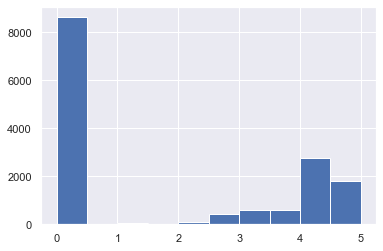

In [370]:
plt.hist(data["mean_rating"])
plt.savefig("mean_rating.png")
plt.show()

In [364]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito',
       'popularity', 'mean_rating'],
      dtype='object')

In [365]:
data['all_reviews_cnt'] = data[reviews_count_columns].sum(axis=1)

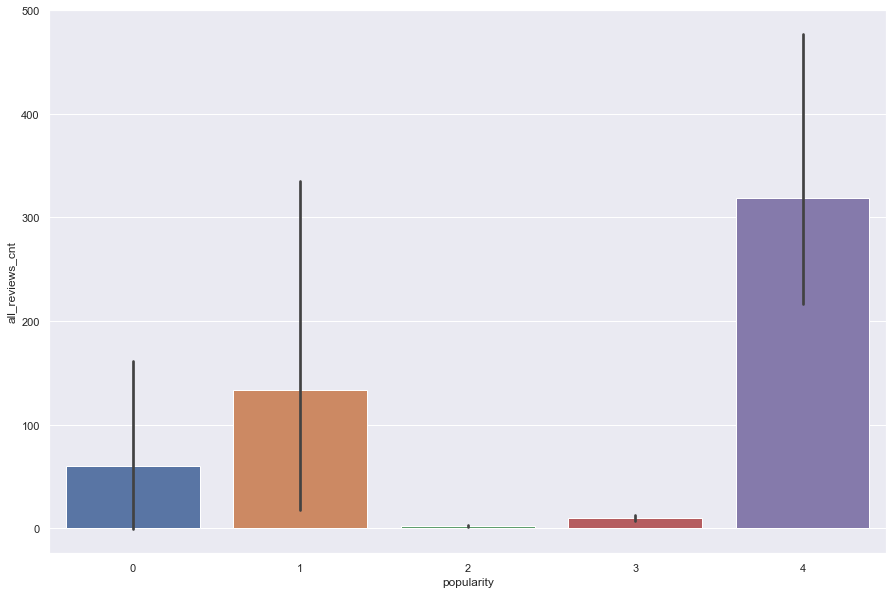

In [373]:
plt.figure(figsize=(15, 10))
sns.barplot(x=data.popularity, y=data.all_reviews_cnt)
plt.savefig("figures/barplot_popularity_all_reviews_cnt.png")

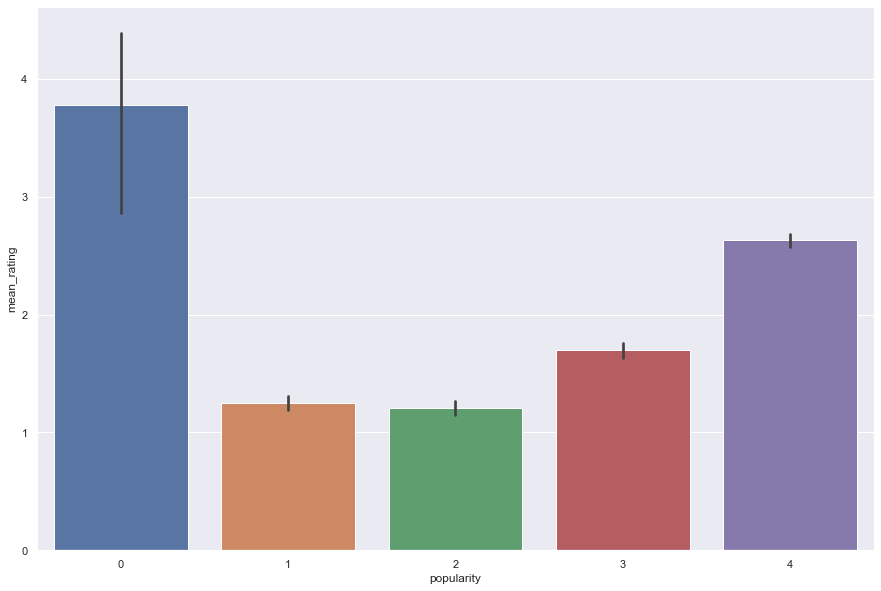

In [372]:
plt.figure(figsize=(15, 10))
sns.barplot(x=data.popularity, y=data.mean_rating)
plt.savefig("figures/barplot_popularity_mean_rating.png")